# Customer Churn Analysis Project

## Overview
This project aims to analyze customer churn for a telecommunications company. Customer churn refers to the phenomenon where customers stop doing business with a company, which can significantly impact revenue and growth. The dataset used in this analysis contains customer information and their churn status, providing insights into patterns and factors that influence customer retention.

## Dataset
The dataset utilized for this analysis is the "Telco Customer Churn" dataset, which was downloaded from Kaggle. It includes various customer attributes such as demographics, account information, and service usage.
Dataset Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Steps
1. **Data Loading**: The dataset is loaded from the specified path after downloading.
2. **Data Exploration**: Initial inspection of the dataset is performed to understand its structure and identify missing values.
3. **Data Preprocessing**:
   - Convert the 'TotalCharges' column to numeric and handle any missing values.
   - Encode categorical variables, including converting the 'Churn' column to binary.
   - Create dummy variables for other categorical features and drop irrelevant columns.
4. **Exploratory Data Analysis (EDA)**:
   - Visualize the distribution of churned vs. non-churned customers.
   - Generate a correlation heatmap to identify relationships between features and churn.
5. **Modeling**:
   - Split the dataset into training and testing sets.
   - Train a Random Forest classifier to predict customer churn and analyze feature importance.
   - Use Logistic Regression as a baseline model for comparison.
6. **Clustering**:
   - Perform K-Means clustering to segment customers based on selected features.
   - Analyze the mean churn rates for different clusters to identify trends.
7. **Survival Analysis**:
   - Conduct survival analysis using the Kaplan-Meier estimator to understand customer retention over time.

In [2]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [4]:
directory_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1'

# List all files in the directory
files = os.listdir(directory_path)
print(files)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [5]:
customer_churn_file_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
# Load the data
customer_churn_df = pd.read_csv(customer_churn_file_path)

In [7]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce')

# Check for any missing values after conversion
print(customer_churn_df.isnull().sum())

# Fill any NaN values in 'TotalCharges' with the median
customer_churn_df['TotalCharges'].fillna(customer_churn_df['TotalCharges'].median(), inplace=True)

# Convert 'Churn' column to binary
customer_churn_df['Churn'] = customer_churn_df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'gender' to binary
customer_churn_df['gender'] = customer_churn_df['gender'].map({'Male': 1, 'Female': 0})

# Drop the 'customerID' column
customer_churn_df.drop(columns=['customerID'], inplace=True)

# Convert other categorical columns to dummy variables
customer_churn_df = pd.get_dummies(customer_churn_df, drop_first=True)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

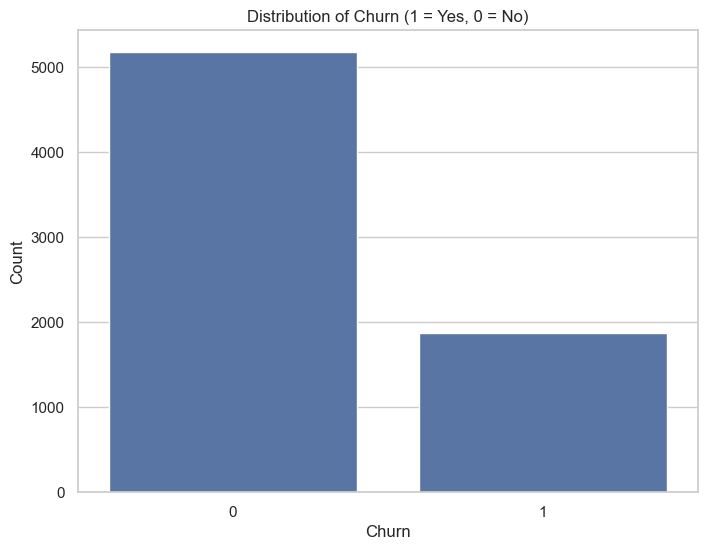

In [10]:
# Set the visualisation style
sns.set(style="whitegrid")

# Plotting the distribution of Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=customer_churn_df)
plt.title('Distribution of Churn (1 = Yes, 0 = No)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


The chart displays the distribution of customer churn, indicating the number of customers who have churned (1) and those who have not (0).

Observations:

Class Imbalance: The most striking observation is the significant class imbalance. The majority of customers have not churned (class 0), while the number of customers who have churned (class 1) is much smaller. This imbalance poses challenges for building a predictive model, as the model might be biased towards the majority class.

Quantitative Data: The chart does not provide exact numbers for the frequency of each class. However, based on the bar heights, we can see that the number of non-churned customers is significantly larger than the number of churned customers.

Possible Insights:

Business Impact: The high number of non-churned customers indicates that the company has a relatively stable customer base. However, the presence of churned customers highlights the need for strategies to retain customers and reduce churn rates.

Model Building: To build an effective churn prediction model, it's crucial to address the class imbalance. This can be done through techniques like oversampling, undersampling, or SMOTE (Synthetic Minority Over-sampling Technique).

Feature Engineering: Creating new features that can better differentiate between churned and non-churned customers can improve model performance. For example, features related to customer behavior, usage patterns, or demographics might be helpful.

Evaluation Metrics: Using appropriate evaluation metrics like precision, recall, F1-score, and AUC-ROC is essential for assessing the performance of churn prediction models on imbalanced datasets.

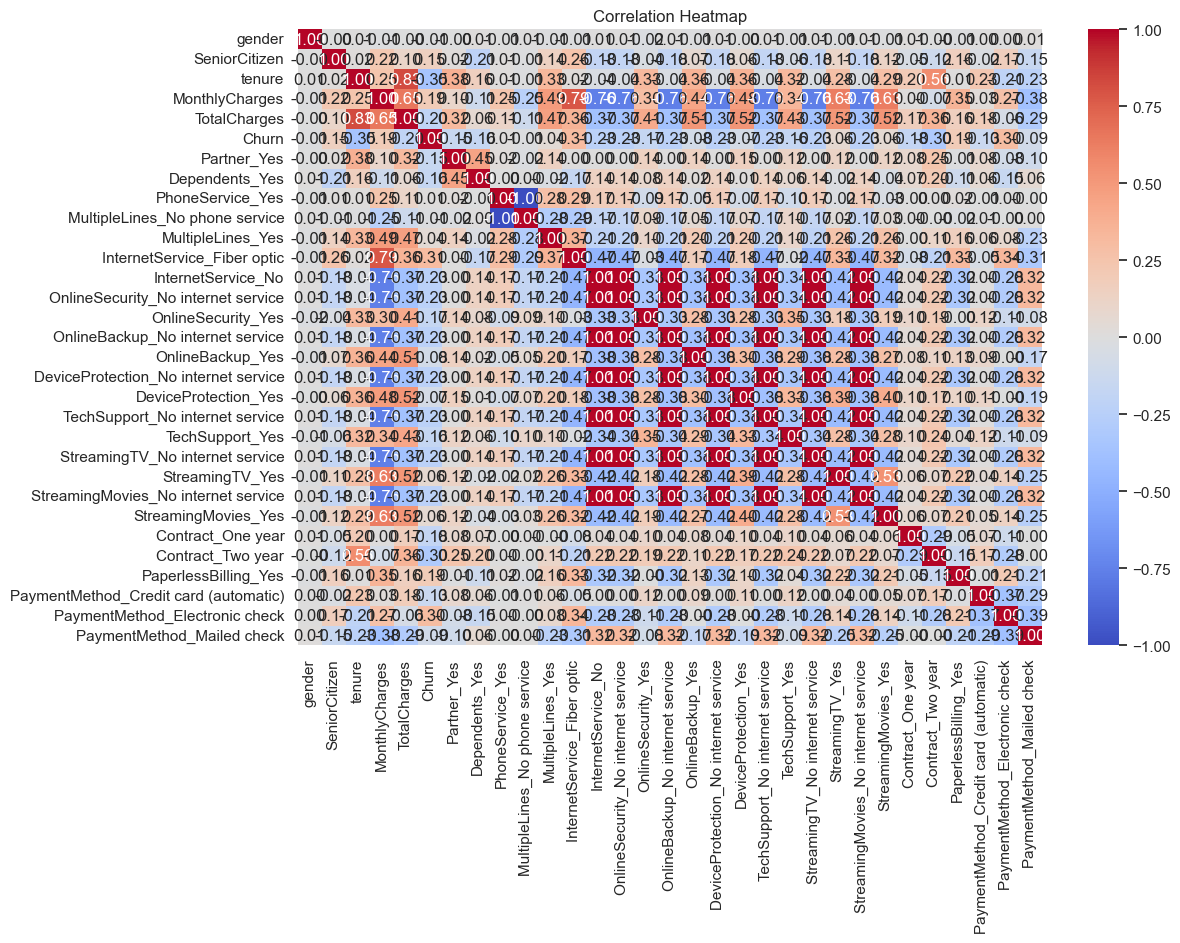

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = customer_churn_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations from the Heatmap:

Strong Positive Correlation:

Tenure and Total Charges: There is a strong positive correlation between tenure and total charges, which makes intuitive sense. As customers stay longer, they tend to incur higher charges.
MultipleLines and OnlineSecurity: There is a moderate positive correlation between having multiple lines and online security. This suggests that customers who have multiple lines are more likely to opt for online security.

Strong Negative Correlation:

Churn and Tenure: There is a strong negative correlation between churn and tenure. This indicates that customers who have been with the company for a longer period are less likely to churn.

# Feature Importance

In [15]:
# Extract correlations with Churn
correlation_with_churn = customer_churn_df.corr()['Churn'].sort_values(ascending=False)
print(correlation_with_churn)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


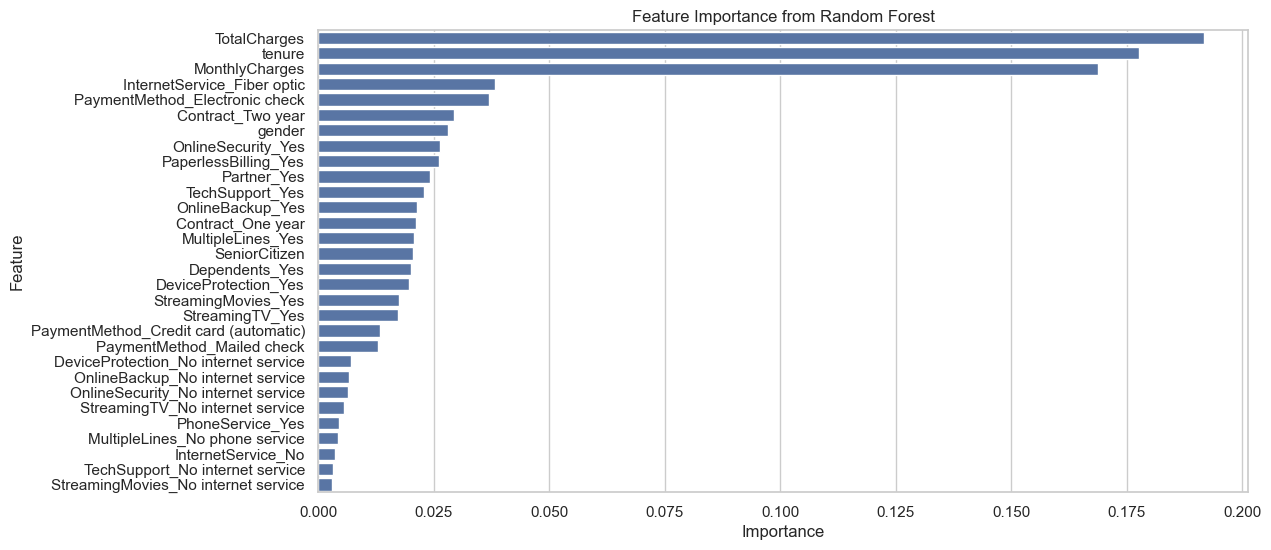

In [16]:
# Define features and target variable
X = customer_churn_df.drop('Churn', axis=1)
y = customer_churn_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

The chart displays the importance of different features in predicting customer churn based on a Random Forest model. The x-axis represents the importance score, and the y-axis shows the features in descending order of importance.

**Observations:**

Top Features: The top features identified by the model are:

Total Charges: This indicates that the total amount spent by a customer is a strong predictor of churn.
Tenure: Customers who have been with the company for longer tend to be less likely to churn.
Monthly Charges: Higher monthly charges might be associated with higher churn rates.
Feature Groups: The features can be broadly categorized into:

Customer Demographics: Features like Senior Citizen, Partner, and Dependents might provide insights into customer segments with higher churn rates.
Services: Features related to internet service, phone service, and streaming services might indicate customer preferences and satisfaction levels.
Contract and Payment: Features like Contract and PaymentMethod might reveal customer loyalty and commitment to the company.
Insights for Churn Prediction:

Focus on Customer Value: The importance of Total Charges and Monthly Charges suggests that focusing on customer value and providing competitive pricing can help reduce churn.
Targeted Retention Strategies: Identifying customer segments with higher churn rates based on features like Senior Citizen, Partner, and Dependents can help in implementing targeted retention strategies.
Improving Customer Experience: Features related to services and payment methods highlight the importance of providing excellent customer service and flexible payment options.

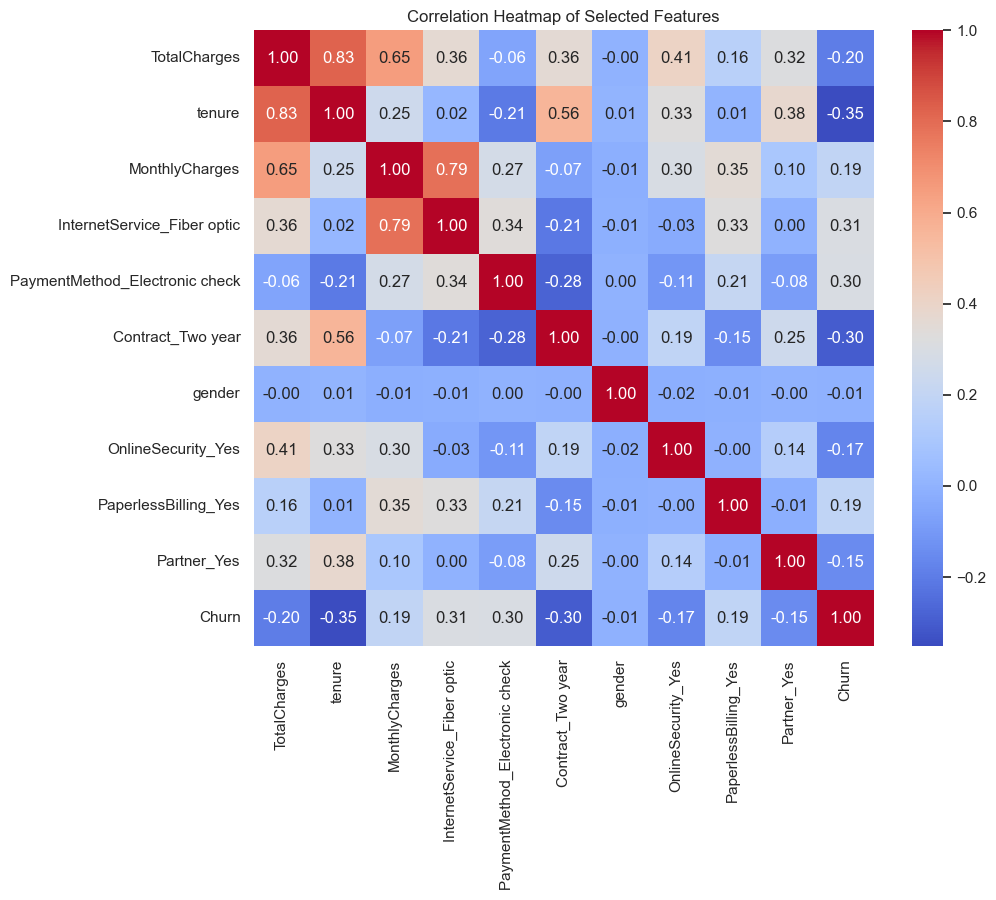

In [18]:
# Select top features based on importance
top_features = feature_importance_df['Feature'].head(10).tolist()

# Create a correlation matrix for the top features and Churn
top_corr = customer_churn_df[top_features + ['Churn']].corr()

# Plot the correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [19]:
# Group by categorical features and analyze their mean Churn rate
categorical_features = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod']

# Filter out any features that don't exist in the DataFrame
existing_features = [feature for feature in categorical_features if feature in customer_churn_df.columns]

for feature in existing_features:
    churn_rate = customer_churn_df.groupby(feature)['Churn'].mean()
    print(f'\nChurn rate by {feature}:\n', churn_rate)



Churn rate by gender:
 gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64


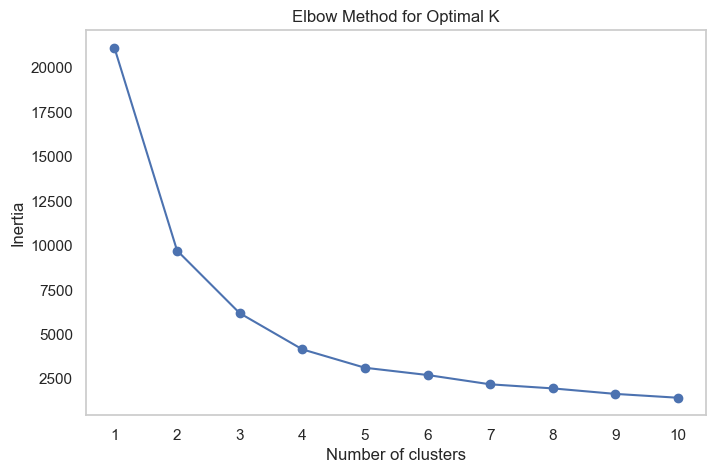

           gender  SeniorCitizen     tenure  MonthlyCharges  TotalCharges  \
Cluster                                                                     
0        0.501866       0.202239  13.267164       75.073619   1036.212771   
1        0.500909       0.208636  58.572273       89.672432   5245.974864   
2        0.512252       0.065187  29.392048       26.648151    810.608414   

            Churn  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
Cluster                                                            
0        0.470896     0.339925        0.203358          0.973134   
1        0.153636     0.679545        0.337273          0.939545   
2        0.124364     0.460472        0.380490          0.779473   

         MultipleLines_No phone service  ...  StreamingTV_No internet service  \
Cluster                                  ...                                    
0                              0.026866  ...                         0.000000   
1                             

In [20]:
# Select relevant features for segmentation (adjust as needed)
features_for_clustering = customer_churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Based on the elbow plot, choose the number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_churn_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = customer_churn_df.groupby('Cluster').mean()
print(cluster_summary)


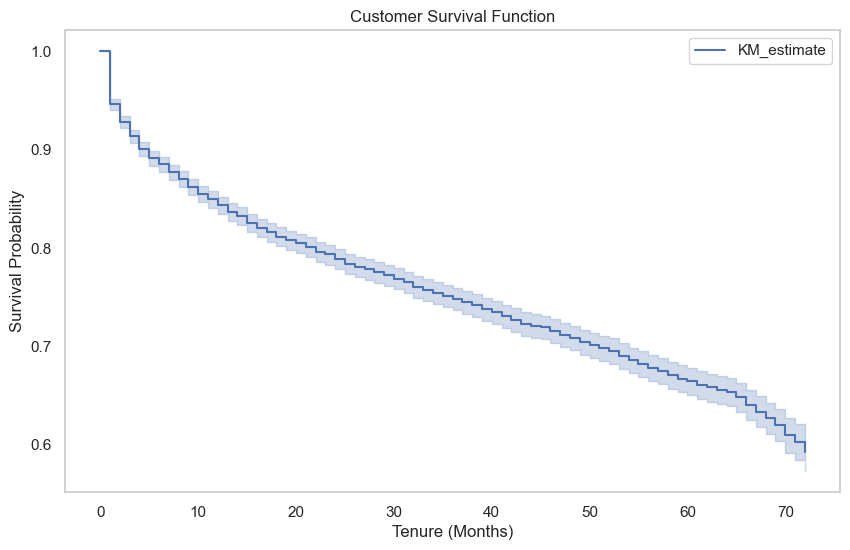

In [21]:
# Prepare the data for survival analysis
# Define duration (tenure in months) and event (churn)
duration = customer_churn_df['tenure']
event = customer_churn_df['Churn']  # 1 if churned, 0 otherwise

# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(duration, event)

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Customer Survival Function')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

**Kaplan-Meier Curve**

Data: The chart shows the probability of a customer remaining active (not churning) over time (tenure in months).

Observations:

Overall Trend: The survival probability decreases over time, indicating that the longer a customer stays, the higher the chance of them churning.

Initial Drop: There's a steeper decline in the survival probability in the initial months, suggesting that a significant portion of churn occurs early on.

Plateauing: The curve gradually levels off, indicating that the churn rate stabilizes after a certain period.
Insights for Churn Prediction:

Early Intervention: The initial drop in the survival probability highlights the importance of focusing on retaining new customers. Implementing strategies to improve customer onboarding and satisfaction can help reduce early churn.

Proactive Retention: The plateauing of the curve suggests that proactive retention efforts might be more effective for long-term customers. Offering incentives, personalized offers, or targeted communication can help retain these customers.

Customer Segmentation: Analyzing the survival curves for different customer segments (e.g., based on demographics, service usage, or contract type) can help identify groups with higher churn rates and tailor retention strategies accordingly.

In [23]:
# Define features and target variable
X = customer_churn_df.drop('Churn', axis=1)
y = customer_churn_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Performance:
[[932 104]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy: 0.8190205819730305

Random Forest Performance:
[[940  96]
 [195 178]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7934705464868701


# Model Performance Comparison

The Logistic Regression and Random Forest models show differing levels of performance for this dataset, as shown by their confusion matrices and classification reports. Here’s an interpretation of each model’s performance:

## Logistic Regression Performance
**Confusion Matrix:**
- True Negatives (0s correctly predicted as 0s): 932
- False Positives (0s incorrectly predicted as 1s): 104
- False Negatives (1s incorrectly predicted as 0s): 151
- True Positives (1s correctly predicted as 1s): 222

**Classification Report:**
- **Class 0 (Majority Class):**
  - **Precision:** 0.86 — Out of all predictions for class 0, 86% were correct.
  - **Recall:** 0.90 — Out of all true instances of class 0, 90% were correctly identified.
  - **F1-Score:** 0.88 — A balanced measure of precision and recall, indicating strong performance for this class.
- **Class 1 (Minority Class):**
  - **Precision:** 0.68 — 68% of predictions for class 1 were correct.
  - **Recall:** 0.60 — Only 60% of true class 1 instances were correctly identified, suggesting the model struggles with recall for this class.
  - **F1-Score:** 0.64 — Shows a moderate ability to handle class 1 but is weaker than class 0.
- **Overall Accuracy:** 0.82, indicating that 82% of predictions are correct.

**Macro Avg:** Averages for precision (0.77), recall (0.75), and F1-score (0.76) reflect lower performance on class 1, bringing down the overall macro scores.

**Interpretation:** Logistic Regression performs well on the majority class (class 0) but has difficulty correctly identifying instances of the minority class (class 1), as indicated by lower recall and F1-scores for class 1. This imbalance suggests that the model may benefit from adjustments like rebalancing the dataset or tuning model parameters to better capture minority class characteristics.

---

## Random Forest Performance
**Confusion Matrix:**
- True Negatives: 940
- False Positives: 96
- False Negatives: 195
- True Positives: 178

**Classification Report:**
- **Class 0 (Majority Class):**
  - **Precision:** 0.83 — 83% of predictions for class 0 were correct.
  - **Recall:** 0.91 — 91% of true class 0 instances were correctly identified.
  - **F1-Score:** 0.87 — Reflects strong performance for this class, similar to Logistic Regression.
- **Class 1 (Minority Class):**
  - **Precision:** 0.65 — 65% of predictions for class 1 were correct.
  - **Recall:** 0.48 — Only 48% of true class 1 instances were correctly identified, which is notably lower than the Logistic Regression model.
  - **F1-Score:** 0.55 — Indicates weaker performance on class 1 due to a lower recall.
- **Overall Accuracy:** 0.79, meaning 79% of predictions are correct.

**Macro Avg:** With precision at 0.74, recall at 0.69, and F1-score at 0.71, these averages reflect a stronger performance for class 0 but weaker for class 1.

**Interpretation:** Random Forest performs well on class 0, with a slight improvement in recall compared to Logistic Regression. However, it struggles more with class 1, as indicated by the lower recall and F1-score. This suggests that while Random Forest has a high capacity for the majority class, it may need additional tuning (e.g., adjusting class weights or hyperparameters) to improve minority class predictions.

---

## Overall Comparison
- **Class 0 (Majority):** Both models perform well, with Random Forest showing slightly higher recall but similar overall effectiveness.
- **Class 1 (Minority):** Logistic Regression outperforms Random Forest in recall and F1-score, making it slightly better for capturing the minority class.
- **Accuracy:** Logistic Regression (82%) slightly outperforms Random Forest (79%), largely due to its stronger performance on class 1.

**Summary:** Logistic Regression provides a more balanced performance across both classes, while Random Forest excels with the majority class but requires improvement on the minority class. Logistic Regression would be preferred if balanced performance is critical, whereas Random Forest might be favored with adjustments if the priority is the majority class.


# Conclusion
The analysis identifies key factors influencing customer churn and highlights the importance of certain features in predicting churn. The Random Forest model provides insights into feature importance, while clustering helps segment customers for targeted retention strategies. The survival analysis offers a view of customer longevity, guiding marketing and customer service strategies.

The findings from this project can inform decision-making and strategic initiatives aimed at reducing churn and enhancing customer satisfaction.